<a href="https://colab.research.google.com/github/alyhussein86/HNgcTEOxBhbzsCbR/blob/main/Happy_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

In [2]:
reader = pd.read_csv("ACME-HappinessSurvey2020.csv")

# Setting Data Fetures as X and Target as Y

# X = reader.drop(columns=['Y']) # as Features
# y = reader['Y']  # assiging target as Y

X = reader.iloc[:, 1:].values
y = reader.iloc[:, 0].values

# print('Feature: ', X)
# print('Target: ', y)

print(reader.iloc[:, 1:].head(),"\n", X.shape, y.shape)

   X1  X2  X3  X4  X5  X6
0   3   3   3   4   2   4
1   3   2   3   5   4   3
2   5   3   3   3   3   5
3   5   4   3   3   3   5
4   5   4   3   3   3   5 
 (126, 6) (126,)


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>],
       [<Axes: title={'center': 'X5'}>, <Axes: title={'center': 'X6'}>,
        <Axes: >, <Axes: >]], dtype=object)

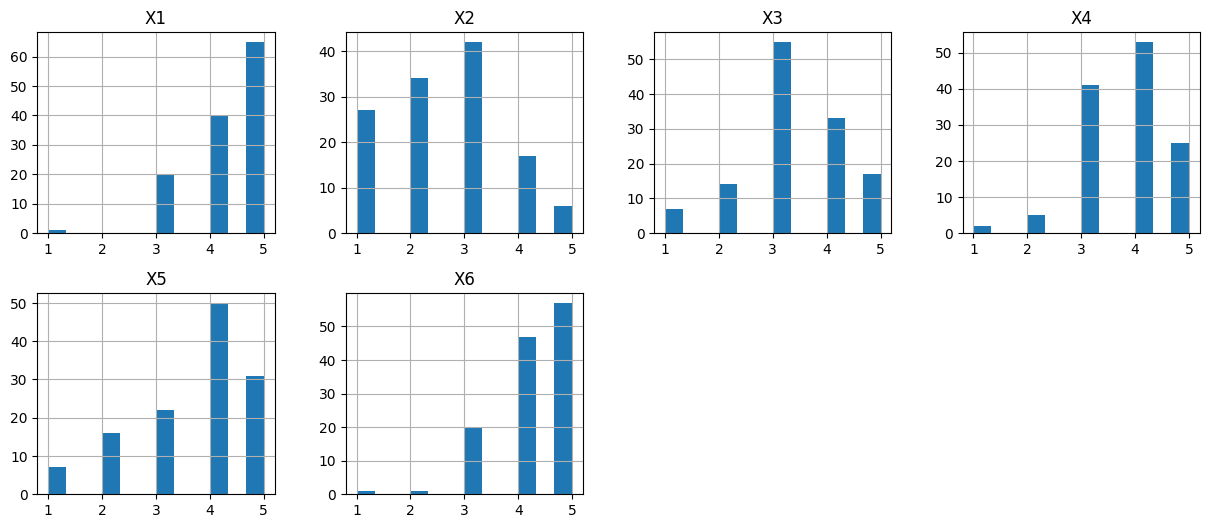

In [3]:
reader.iloc[:, 1:].hist(bins=12, figsize=(15, 6), layout=(2, 4))

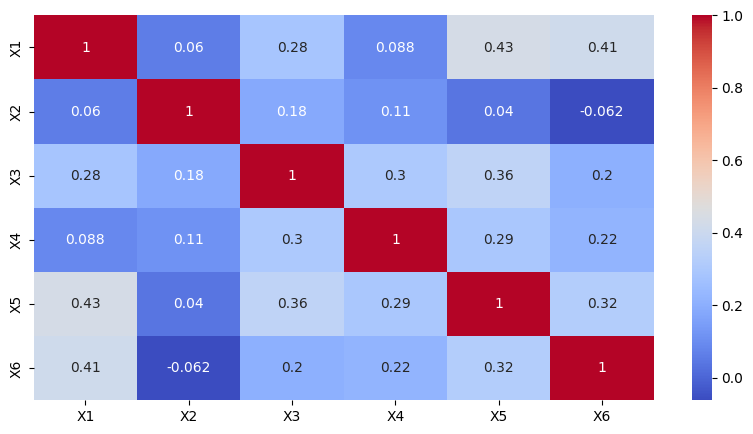

In [4]:
import seaborn as sns
plt.figure(figsize = (10,5))
sns.heatmap(reader.iloc[:, 1:].corr(), annot = True, cmap="coolwarm")
plt.show()

Splitting and Training

In [5]:
# # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1)


print("X_train: \n", X_train.shape, "\n X_test:\n", X_test.shape)

X_train: 
 (100, 6) 
 X_test:
 (26, 6)


Logistic Regression

In [6]:
# LogisticRegression
lg = LogisticRegression(random_state=1, C=1, solver='liblinear')
lg.fit(X_train, y_train)

y_pred_lg = lg.predict(X_test)

print(np.concatenate((y_pred_lg.reshape(len(y_pred_lg), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]]


In [7]:
print(lg.predict([[3, 3, 3, 4, 2, 4]]))

[0]


In [8]:
Logistic_cm = confusion_matrix(y_test,y_pred_lg)
print(Logistic_cm)
print("Logistic accuracy score: {:.2f} %".format(accuracy_score(y_test,y_pred_lg)*100))

[[ 4  6]
 [ 5 11]]
Logistic accuracy score: 57.69 %


In [9]:
accuracylg= cross_val_score(estimator = lg, X=X_train, y=y_train, cv=40)
print("Accuracy mean: {:.2f}%".format(accuracylg.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracylg.std()*100))

Accuracy mean: 57.08%
Standard Deviation: 30.48


In [10]:
params = {'C':[0.1,0.01,0.02,0.3,0.0015,1], 'solver':["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
grid_search_lg = GridSearchCV(estimator= lg, param_grid=params, cv= 25 , scoring='accuracy', n_jobs = -1)
grid_search_lg.fit(X_train, y_train)
best_accuracy_lg = grid_search_lg.best_score_
best_params_lg = grid_search_lg.best_params_
print("Best Accuracy for Logistisc regression: {:.2f}%".format(best_accuracy_lg*100))
print("Best params for Logistisc regression: ",best_params_lg)

Best Accuracy for Logistisc regression: 61.00%
Best params for Logistisc regression:  {'C': 0.01, 'solver': 'lbfgs'}


DecisionTreeClassifier

In [11]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_split= 2, splitter="random", random_state=0)
dtc.fit(X_train, y_train)

y_pred_dt = dtc.predict(X_test)
print(np.concatenate((y_pred_dt.reshape(len(y_pred_dt), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


In [12]:
print(dtc.predict([[3, 3, 3, 4, 2, 4]]))

[0]


In [13]:
dtc_cm = confusion_matrix(y_test,y_pred_dt)
print(dtc_cm)
print("DecisionTree accuracy score:  {:.2f}%".format(accuracy_score(y_test,y_pred_dt)*100))

[[ 5  5]
 [ 2 14]]
DecisionTree accuracy score:  73.08%


In [14]:
accuracydtc= cross_val_score(estimator = dtc, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f}%".format(accuracydtc.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracydtc.std()*100))

Accuracy: 67.00%
Standard Deviation: 14.18%


In [15]:
params = {'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'splitter':["random","best"], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_dt = GridSearchCV(estimator= dtc, param_grid=params, cv= 35 , scoring='accuracy', n_jobs = -1)
grid_search_dt.fit(X_train, y_train)
best_accuracy_dt = grid_search_dt.best_score_
best_params_dt = grid_search_dt.best_params_
print("Best Accuracy for DecisionTree: {:.2f}%".format(best_accuracy_dt*100))
print("Best params for DecisionTree: ",best_params_dt)

Best Accuracy for DecisionTree: 73.81%
Best params for DecisionTree:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 8, 'splitter': 'random'}


In [16]:
rfe_dt = RFE(estimator= dtc, n_features_to_select=3, step=1)
rfe_dt.fit(X_train,y_train)
print("Support: ",rfe_dt.support_)
print("Ranking: ",rfe_dt.ranking_)

Support:  [ True  True False False False  True]
Ranking:  [1 1 2 4 3 1]


RandomForest

In [17]:
rdc = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=14, min_samples_split=8, random_state=0)
rdc.fit(X_train, y_train)

y_pred_rdc = rdc.predict(X_test)
# print(y_pred)
print(np.concatenate((y_pred_rdc.reshape(len(y_pred_rdc), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


In [18]:
print(rdc.predict([[3, 3, 3, 4, 2, 4]]))

[0]


In [19]:
rdc_cm = confusion_matrix(y_test,y_pred_rdc)
print(rdc_cm)
print("RandomForest accuracy score: {:.2f} %".format(accuracy_score(y_test,y_pred_rdc)*100))

[[ 4  6]
 [ 4 12]]
RandomForest accuracy score: 61.54 %


In [20]:
accuracyrdc= cross_val_score(estimator = rdc, X=X_train, y=y_train, cv=10)
print("Accuracy mean: {:.2f}%".format(accuracyrdc.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracyrdc.std()*100))

Accuracy mean: 54.00%
Standard Deviation: 11.14


In [21]:
params = {'n_estimators': [10, 20, 25, 50, 100], 'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_rd = GridSearchCV(estimator= rdc, param_grid=params, cv= 32 , scoring='accuracy', n_jobs = -1)
grid_search_rd.fit(X_train, y_train)
best_accuracy_rd = grid_search_rd.best_score_
best_params_rd = grid_search_rd.best_params_
print("Best Accuracy for RandomForest: {:.2f}%".format(best_accuracy_rd*100))
print("Best params for RandomForest: ",best_params_rd)

Best Accuracy for RandomForest: 63.28%
Best params for RandomForest:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 10}


In [22]:
rfe_rd = RFE(estimator= rdc, n_features_to_select=3, step=1)
rfe_rd.fit(X_train,y_train)
print("Support: ",rfe_rd.support_)
print("Ranking: ",rfe_rd.ranking_)

Support:  [ True  True  True False False False]
Ranking:  [1 1 1 4 3 2]


KNN Classifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree', leaf_size=40 ,p=6, metric='minkowski')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
# print(y_pred)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [24]:
print(rdc.predict([[3, 3, 3, 4, 2, 4]]))

[0]


In [25]:
knn_cm = confusion_matrix(y_test,y_pred_knn)
print(knn_cm)
print("KNN accuracy score: {:.2f} %".format(accuracy_score(y_test,y_pred_knn)*100))

[[7 3]
 [7 9]]
KNN accuracy score: 61.54 %


In [26]:
accuracy_knn= cross_val_score(estimator = knn, X=X_train, y=y_train, cv=35)
print("Accuracy mean: {:.2f}%".format(accuracy_knn.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracy_knn.std()*100))

Accuracy mean: 55.71%
Standard Deviation: 30.59


In [27]:
params = {'n_neighbors':[2,4,5,6,7], 'algorithm': ["auto","kd_tree","ball_tree"], 'leaf_size':[40,45,50] ,'p':[2,4,6,8,10] ,'metric':['minkowski']}
grid_search_knn = GridSearchCV(estimator= knn, param_grid=params, cv= 35 , scoring='accuracy', n_jobs = -1)
grid_search_knn.fit(X_train, y_train)
best_accuracy_knn = grid_search_knn.best_score_
best_params_knn = grid_search_knn.best_params_
print("Best Accuracy for KNearestNeigbor: {:.2f}%".format(best_accuracy_knn*100))
print("Best params for KNearestNeigbor: ",best_params_knn)

Best Accuracy for KNearestNeigbor: 62.86%
Best params for KNearestNeigbor:  {'algorithm': 'auto', 'leaf_size': 50, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 4}


SVM Classification

In [28]:
sv = SVC(kernel="rbf", random_state=0)
sv.fit(X_train,y_train)

y_pred_sv = sv.predict(X_test)
print(np.concatenate((y_pred_sv.reshape(len(y_pred_sv), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


In [29]:
print(rdc.predict([[3, 3, 3, 4, 2, 4]]))

[0]


In [30]:
sv_cm = confusion_matrix(y_test,y_pred_sv)
print(sv_cm)
print("SVM accuracy Score {:.2f} %".format(accuracy_score(y_test,y_pred_sv)*100))

[[ 3  7]
 [ 4 12]]
SVM accuracy Score 57.69 %


In [31]:
accuracy_sv= cross_val_score(estimator = sv, X=X_train, y=y_train, cv=10)
print("Accuracy mean: {:.2f}%".format(accuracy_sv.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracy_sv.std()*100))

Accuracy mean: 57.00%
Standard Deviation: 11.00


In [32]:
params = {'kernel': ["linear","poly", "rbf", "sigmoid"],'gamma':["scale"], 'decision_function_shape' : ["ovo"]}
grid_search_sv = GridSearchCV(estimator= sv, param_grid=params, cv= 35 , scoring='accuracy', n_jobs = -1)
grid_search_sv.fit(X_train, y_train)
best_accuracy_sv = grid_search_sv.best_score_
best_params_sv = grid_search_sv.best_params_
print("Best Accuracy for SVM: {:.2f}%".format(best_accuracy_sv*100))
print("Best params for SVM: ",best_params_sv)

Best Accuracy for SVM: 63.33%
Best params for SVM:  {'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}


XGBoost

In [33]:
xg = XGBClassifier()
xg.fit(X_train,y_train)

y_pred_xg = xg.predict(X_test)
print(np.concatenate((y_pred_xg.reshape(len(y_pred_xg), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


In [34]:
xg_cm = confusion_matrix(y_test,y_pred_xg)
print(xg_cm)
print("XGBoost accuracy score: {:.2f}%".format(accuracy_score(y_test,y_pred_xg)*100))

[[ 4  6]
 [ 6 10]]
XGBoost accuracy score: 53.85%


In [35]:
accuracy_xg= cross_val_score(estimator = xg, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f}%".format(accuracy_xg.mean()*100))
print("Standard Deviation: {:.2f}".format(accuracy_xg.std()*100))

Accuracy: 63.00%
Standard Deviation: 11.00


In [36]:
rfe_xg = RFE(estimator= xg, n_features_to_select=3, step=1)
rfe_xg.fit(X_train,y_train)
print("Support: ",rfe_xg.support_)
print("Ranking: ",rfe_xg.ranking_)

Support:  [ True False  True False False  True]
Ranking:  [1 3 1 4 2 1]


Checking Feature Importance

In [37]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.18736467 0.21871893 0.19357799 0.10915223 0.16049693 0.13068925]


Based on the above results removing X4 and or X6

In [38]:
# removing X6
X_new = reader.drop(columns=['Y','X4','X6']) #.iloc[:, 1:4].values
y_new = reader.iloc[:, 0].values

# print(reader.iloc[:, 1:].head(),"\n", X.shape, y.shape)
# print(reader.iloc[:, 1:4].head(),"\n", X_new.shape, y_new.shape)
print(X_new.head(),"\n", X_new.shape, y_new.shape)

   X1  X2  X3  X5
0   3   3   3   2
1   3   2   3   4
2   5   3   3   3
3   5   4   3   3
4   5   4   3   3 
 (126, 4) (126,)


In [39]:
# # Split the dataset into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.20, random_state=0)

dtc_new = DecisionTreeClassifier(criterion='gini', max_depth=10,min_samples_split=8, splitter="best", random_state=0)
dtc_new.fit(X_train_new, y_train_new)

y_pred_dt_new = dtc_new.predict(X_test_new)
print(np.concatenate((y_pred_dt_new.reshape(len(y_pred_dt_new), 1), y_test_new.reshape(len(y_test_new), 1)), 1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]]


In [40]:
dtc_cm_new = confusion_matrix(y_test_new,y_pred_dt_new)
print(dtc_cm_new)
print("DecisionTree accuracy score:  {:.2f}%".format(accuracy_score(y_test_new,y_pred_dt_new)*100))

[[ 9  4]
 [ 2 11]]
DecisionTree accuracy score:  76.92%


In [41]:
params = {'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'splitter':["random","best"], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_dt_new = GridSearchCV(estimator= dtc_new, param_grid=params, cv= 20 , scoring='accuracy', n_jobs = -1)
grid_search_dt_new.fit(X_train_new, y_train_new)
best_accuracy_dt_new = grid_search_dt_new.best_score_
best_params_dt_new = grid_search_dt_new.best_params_
print("Best Accuracy for DecisionTree: {:.2f}%".format(best_accuracy_dt_new*100))
print("Best params for DecisionTree: ",best_params_dt_new)

Best Accuracy for DecisionTree: 69.00%
Best params for DecisionTree:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 6, 'splitter': 'random'}
